In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import seaborn as sns
import datetime as dt

Define Functions/Re-useable Code

In [2]:
def printMostRecentMovie(df):
    df.sort_values('release_date', ascending=False, inplace=True)
    print("Most recent film in dataset is: " + df['original_title'].iloc[0] + ", released on " + str(df['release_date'].iloc[0].date()) )
    print("Least recent film in dataset is: " + df['original_title'].iloc[-1] + ", released on " + str(df['release_date'].iloc[-1].date()) )
    return

In [3]:
def removeInvalidRows(df):
    df.drop(df[df.budget == 0].index, inplace=True)
    df.drop(df[df.revenue == 0].index, inplace=True)
    return

In [4]:
def removeInvalidRows(df):
    df.drop(df[df.budget == 0].index, inplace=True)
    df.drop(df[df.revenue == 0].index, inplace=True)
    df.drop(df[df.production_companies == 0].index, inplace=True)
    return

In [5]:
def removeLowRevenueFilms(df):
    df.drop(df[ df.revenue < 50000 ].index, inplace=True)
    return

In [6]:
def removeLowBudgetFilms(df):
    df.drop(df[ df.budget < 500000 ].index, inplace=True)
    return

In [7]:
def removeDocumentaries(df):
    df.drop(df[df.first_genre == "Documentary"].index, inplace=True)
    return

In [8]:
def removePreJawsMovies(df):
    df.drop(df[df.release_year < 1975].index, inplace=True)
    return

In [9]:
def addFirstGenre(df):
    df['first_genre'] = df['genres'].apply(lambda val: val.split('|')[0])
    df['first_genre'].value_counts()
    print(martmovies['first_genre'].value_counts())
    return

In [10]:
def removeUnnecessaryColumns(df):
    df.drop(['imdb_id', 'homepage', 'tagline', 'budget_adj', 'revenue_adj', 'vote_count'], inplace=True, axis=1)
    return

In [11]:
def convertReleaseDate(df):
    martmovies['release_date'] = pd.to_datetime(martmovies['release_date'], infer_datetime_format=True, errors='raise')
    return

In [12]:
def addFirstStudio(df):
    df['first_studio'] = df['production_companies'].apply(lambda val: val.split('|')[0])
    df['first_studio'].value_counts()
    print(martmovies['first_studio'].value_counts())
    return

Call Movies Dataset into Pandas

In [13]:
file_url = 'https://github.com/Martmedia/UCDPA_MartinCody/blob/main/tmdb_movies_data.csv'
file_url = '/Users/martincody/Desktop/Martin Cody - Project Files 22 April 2021/tmdb_movies_data.csv'
martmovies = pd.read_csv(file_url)

Call Pre-Defined Functions

In [14]:
convertReleaseDate(martmovies)
martmovies['release_date'].head()

0   2015-06-09
1   2015-05-13
2   2015-03-18
3   2015-12-15
4   2015-04-01
Name: release_date, dtype: datetime64[ns]

In [15]:
removeUnnecessaryColumns(martmovies)

In [16]:
removeInvalidRows(martmovies)

In [17]:
addFirstGenre(martmovies)

Drama              890
Comedy             787
Action             689
Adventure          314
Horror             275
Crime              172
Thriller           160
Fantasy            110
Animation          103
Science Fiction     98
Romance             66
Family              40
Mystery             36
Documentary         32
Music               29
War                 20
History             17
Western             16
TV Movie             1
Name: first_genre, dtype: int64


In [18]:
removePreJawsMovies(martmovies)
removeDocumentaries(martmovies)
removeLowBudgetFilms(martmovies)
removeLowRevenueFilms(martmovies)

In [19]:
martmovies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3571 entries, 0 to 10793
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   id                    3571 non-null   int64         
 1   popularity            3571 non-null   float64       
 2   budget                3571 non-null   int64         
 3   revenue               3571 non-null   int64         
 4   original_title        3571 non-null   object        
 5   cast                  3571 non-null   object        
 6   director              3570 non-null   object        
 7   keywords              3447 non-null   object        
 8   overview              3571 non-null   object        
 9   runtime               3571 non-null   int64         
 10  genres                3571 non-null   object        
 11  production_companies  3540 non-null   object        
 12  release_date          3571 non-null   datetime64[ns]
 13  vote_average     

In [20]:
printMostRecentMovie(martmovies)

Most recent film in dataset is: Anomalisa, released on 2015-12-30
Least recent film in dataset is: Tommy, released on 1975-03-19


In [21]:
martmovies.describe()

,id,popularity,budget,revenue,runtime,vote_average,release_year
count,3571.000000,3571.000000,3.571000e+03,3.571000e+03,3571.000000,3571.000000,3571.000000
mean,40490.775973,1.230977,3.974860e+07,1.140012e+08,109.117614,6.146682,2002.347242
std,68057.270860,1.513048,4.275219e+07,1.813638e+08,19.106121,0.785718,9.547572
min,5.000000,0.010335,5.000000e+05,5.013600e+04,26.000000,2.200000,1975.000000
25%,6959.000000,0.481105,1.200000e+07,1.614721e+07,96.000000,5.600000,1996.000000
50%,11326.000000,0.836515,2.500000e+07,4.979715e+07,106.000000,6.200000,2004.000000
75%,39133.500000,1.412372,5.000000e+07,1.337873e+08,119.000000,6.700000,2010.000000
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,338.000000,8.400000,2015.000000


Chart data to Drive Insights

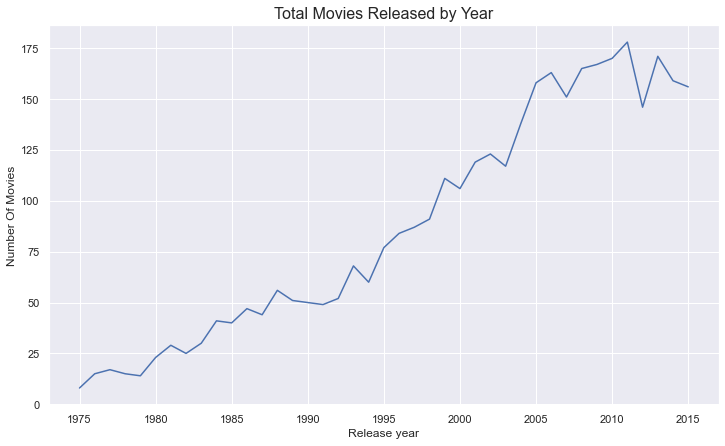

In [23]:
#Plot total movies released by year 1975-2015

datanew=martmovies.groupby('release_year').count()['id']
martmovies.groupby('release_year').count()['id'].plot(xticks = np.arange(1975,2016,5))

#Plot
sns.set(rc={'figure.figsize':(12,7)})
plt.title("Total Movies Released by Year",fontsize = 16)
plt.xlabel('Release year',fontsize = 12)
plt.ylabel('Number Of Movies',fontsize = 12)

sns.set_style("darkgrid")
plt.show()

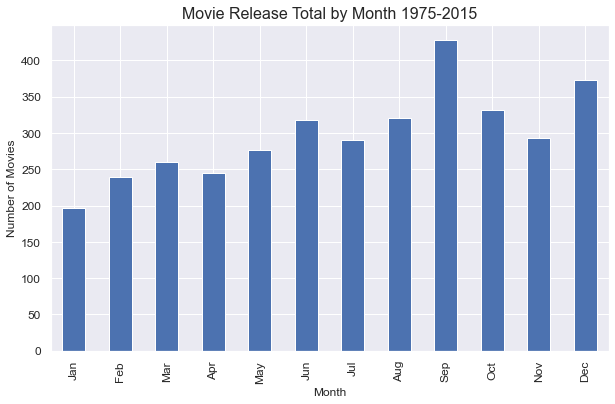

In [25]:
#Plot release pattern by month 1975-2015

#extract the month number from the release date
month_release = martmovies['release_date'].dt.month

#counttotal movies/month using value_counts().
total_mrelease = month_release.value_counts().sort_index()
months=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
total_mrelease = pd.DataFrame(total_mrelease)
total_mrelease['month'] = months

total_mrelease.rename(columns = {'release_date':'total_mrelease'},inplace=True)

#plot 
total_mrelease.plot(x='month',kind='bar',fontsize = 12,figsize=(10,6), legend=False)

plt.title('Movie Release Total by Month 1975-2015',fontsize = 16)
plt.xlabel('Month',fontsize = 12)
plt.ylabel('Number of Movies',fontsize = 12)
sns.set_style("darkgrid")

plt.show()

Delete Selected Genre With Low Counts to Make Some Charts Easier to read

In [26]:
def removeTVmovie(df):
    df.drop(df[df.first_genre == "TV Movie"].index, inplace=True)
    return

In [27]:
def removeWestern(df):
    df.drop(df[df.first_genre == "Western"].index, inplace=True)
    return

In [28]:
def removeHistory(df):
    df.drop(df[df.first_genre == "History"].index, inplace=True)
    return

In [29]:
def removeMusic(df):
    df.drop(df[df.first_genre == "Music"].index, inplace=True)
    return

In [30]:
def removeMystery(df):
    df.drop(df[df.first_genre == "Mystery"].index, inplace=True)
    return

In [31]:
removeTVmovie(martmovies)
removeWestern(martmovies)
removeHistory(martmovies)
removeMusic(martmovies)
removeMystery(martmovies)

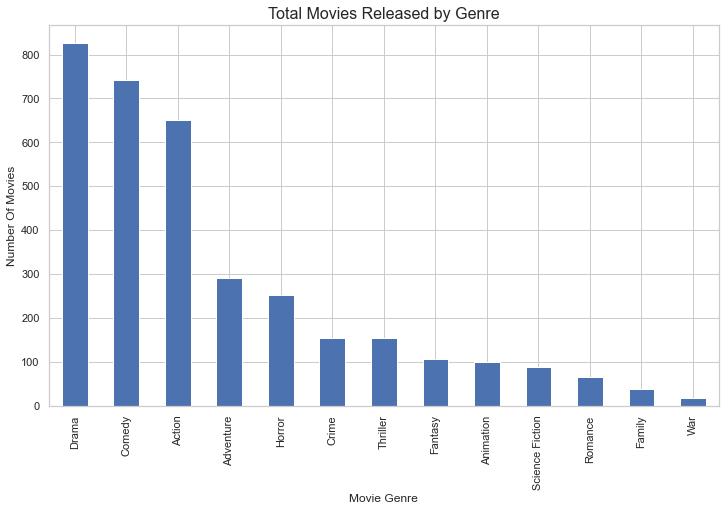

In [33]:
#Plot total releases by genre 1975-2015

movies_genres=martmovies['first_genre'].value_counts().plot(kind='bar')

sns.set(rc={'figure.figsize':(12,7)})
plt.title("Total Movies Released by Genre",fontsize = 16)
plt.xlabel('Movie Genre',fontsize = 12)
plt.ylabel('Number Of Movies',fontsize = 12)

sns.set_style("whitegrid")
plt.show()

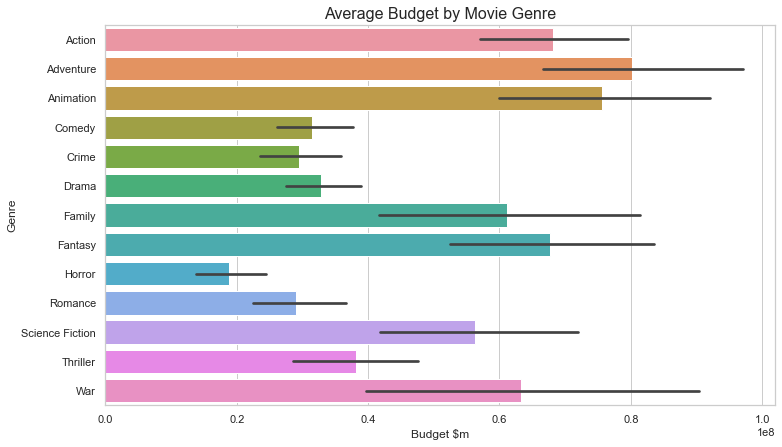

In [34]:
movies_drop = martmovies.groupby(['first_genre', 'budget']).count()
movies_drop.reset_index(inplace=True)
sns.barplot(x='budget', y='first_genre', data=movies_drop)
plt.title("Average Budget by Movie Genre",fontsize = 16)
plt.xlabel('Budget $m',fontsize = 12)
plt.ylabel('Genre',fontsize = 12)

sns.set_style("whitegrid")
plt.show()

Add New Column 'Profitability'

In [35]:
martmovies['Profitability'] = martmovies['revenue'] - martmovies['budget']

In [36]:
martmovies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3486 entries, 144 to 9824
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   id                    3486 non-null   int64         
 1   popularity            3486 non-null   float64       
 2   budget                3486 non-null   int64         
 3   revenue               3486 non-null   int64         
 4   original_title        3486 non-null   object        
 5   cast                  3486 non-null   object        
 6   director              3485 non-null   object        
 7   keywords              3363 non-null   object        
 8   overview              3486 non-null   object        
 9   runtime               3486 non-null   int64         
 10  genres                3486 non-null   object        
 11  production_companies  3455 non-null   object        
 12  release_date          3486 non-null   datetime64[ns]
 13  vote_average    

Plot Top 10 Most Profitable Movies

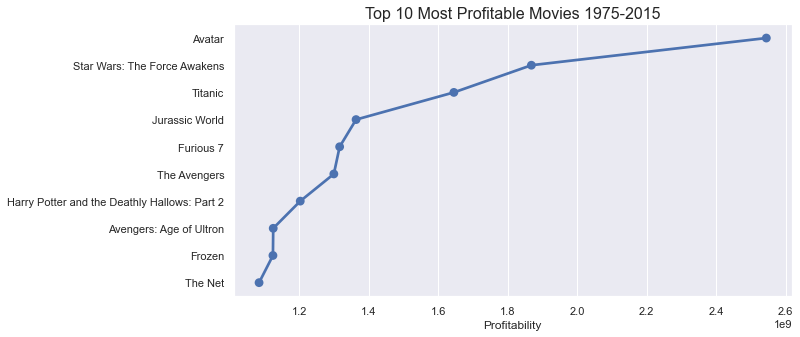

In [38]:
info = pd.DataFrame(martmovies['Profitability'].sort_values(ascending = False))
info['original_title'] = martmovies['original_title']
data = list(map(str,(info['original_title'])))
x = list(data[:10])
y = list(info['Profitability'][:10])

ax = sns.pointplot(x=y,y=x)

sns.set(rc={'figure.figsize':(10,5)})

ax.set_title("Top 10 Most Profitable Movies 1975-2015",fontsize = 16)
ax.set_xlabel("Profitability",fontsize = 12)
sns.set_style("darkgrid")

plt.show()

Express Each Year as an Average Profit Figure

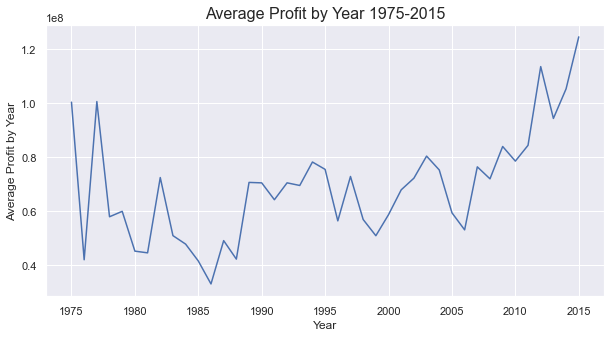

In [40]:
martmovies.groupby('release_year')['Profitability'].mean().plot()


plt.title("Average Profit by Year 1975-2015",fontsize = 16)
plt.xlabel('Year',fontsize = 12)
plt.ylabel('Average Profit by Year',fontsize = 12)

sns.set(rc={'figure.figsize':(10,5)})
sns.set_style("darkgrid")

In [41]:
martmovies.head()

,id,popularity,budget,revenue,original_title,cast,director,keywords,overview,runtime,genres,production_companies,release_date,vote_average,release_year,first_genre,Profitability
144,291270,1.125239,8000000,3759286,Anomalisa,Jennifer Jason Leigh|David Thewlis|Tom Noonan,Duke Johnson|Charlie Kaufman,sex|depression|existentialism,A man crippled by the mundanity of his life ex...,90,Animation|Comedy|Drama|Romance,Starburns Industries,2015-12-30,6.7,2015,Animation,-4240714
15,273248,5.898400,44000000,155760117,The Hateful Eight,Samuel L. Jackson|Kurt Russell|Jennifer Jason ...,Quentin Tarantino,bounty hunter|wyoming|mountains|hangman|voice ...,Bounty hunters seek shelter from a raging bliz...,167,Crime|Drama|Mystery|Western,Double Feature Films|The Weinstein Company|Fil...,2015-12-25,7.4,2015,Crime,111760117
91,274167,1.904898,50000000,240360392,Daddy's Home,Will Ferrell|Mark Wahlberg|Linda Cardellini|Th...,Sean Anders,daddys home,The story of a mild-mannered radio executive (...,96,Comedy,Paramount Pictures|Gary Sanchez Productions|Go...,2015-12-25,5.7,2015,Comedy,190360392
53,274479,2.793297,60000000,101134059,Joy,Jennifer Lawrence|Bradley Cooper|Robert De Nir...,David O. Russell,biography,A story based on the life of a struggling Long...,124,Comedy|Drama,Fox 2000 Pictures|Davis Entertainment|Annapurn...,2015-12-24,6.4,2015,Comedy,41134059
117,266294,1.376605,30000000,105011053,Sisters,Tina Fey|Amy Poehler|John Leguizamo|Ike Barinh...,Jason Moore,sister sister relationship|childhood home,Two disconnected sisters are summoned to clean...,118,Comedy,Little Stranger,2015-12-18,5.9,2015,Comedy,75011053


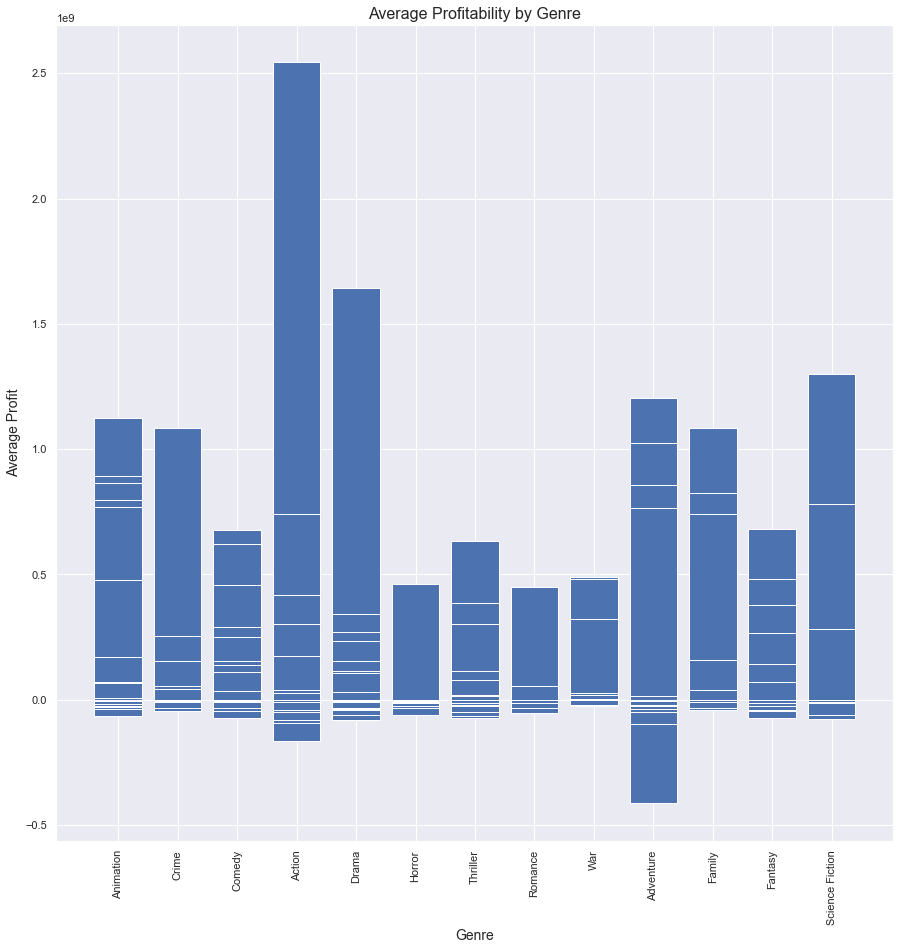

In [42]:
plt.subplots(figsize=(15, 15))
plt.bar(martmovies.first_genre, martmovies.Profitability)
plt.title('Average Profitability by Genre', fontsize=16)
plt.xlabel('Genre', fontsize=14)
plt.xticks(rotation=90)
plt.ylabel('Average Profit', fontsize=14)
plt.show()